Preprocessing the data

In [1]:
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2023-05-20 17:12:06.838699: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Load the data

In [2]:
#load data and metadata of cats_vs_dogs from tensorflow datasets 
data, metadata = tfds.load('tf_flowers', as_supervised=True, with_info=True)

Preprocess the data

In [14]:
#Define the train data
train_data = []

IMG_SIZE = 100

for i, (image, label) in enumerate(data['train']):
    image = cv2.resize(image.numpy(), (IMG_SIZE, IMG_SIZE))
    train_data.append([image, label])

train_data[0]

[array([[[ 97, 126,  32],
         [122, 142,  47],
         [ 96, 130,  31],
         ...,
         [190,   0,   0],
         [178,   2,   2],
         [248,  81,  83]],
 
        [[124, 142,  34],
         [129, 142,  49],
         [110, 136,  49],
         ...,
         [184,   0,   0],
         [198,   2,   1],
         [253,  76,  79]],
 
        [[125, 148,  26],
         [137, 146,  43],
         [124, 148,  65],
         ...,
         [177,   0,   0],
         [252,  61,  71],
         [253,  68,  75]],
 
        ...,
 
        [[ 82, 112,  47],
         [  6,  38,   0],
         [ 20,  47,   4],
         ...,
         [111, 105, 126],
         [ 23,  52,   6],
         [136, 110,  30]],
 
        [[ 28,  53,   0],
         [ 18,  45,   0],
         [ 24,  52,   0],
         ...,
         [ 81,  77,  46],
         [127, 156,  71],
         [221, 241, 112]],
 
        [[ 23,  49,   1],
         [ 23,  50,   0],
         [ 31,  54,   3],
         ...,
         [158, 176,  85],
  

In [15]:
#Set inputs and tragets 
x = [] #Inputs
y = [] #Targets

for image, label in train_data:
    x.append(image)
    y.append(label)

#Scale inputs
x = np.array(x).astype(float) / 255

#transform targets in an array
y = np.array(y)

In [16]:
#Generate more images from the originals
data_gen = ImageDataGenerator(
    rotation_range=30, #randomly rotate images in a range of -30 degrees to +30 degrees.
    width_shift_range=0.2, #random translations in the width of the images by 20%
    height_shift_range=0.2, #random translations in the height of the images by 20%
    shear_range=15, #random deformations in a range of -15 degrees to +15 degrees
    zoom_range=[0.7, 1.4], #Images can be enlarged or reduced in a range from 70% to 140% of their original size.
    horizontal_flip=True, #random horizontal flips on images
    vertical_flip=True, #random vertical flips on images
) 

#Generate the new images
data_gen.fit(x)

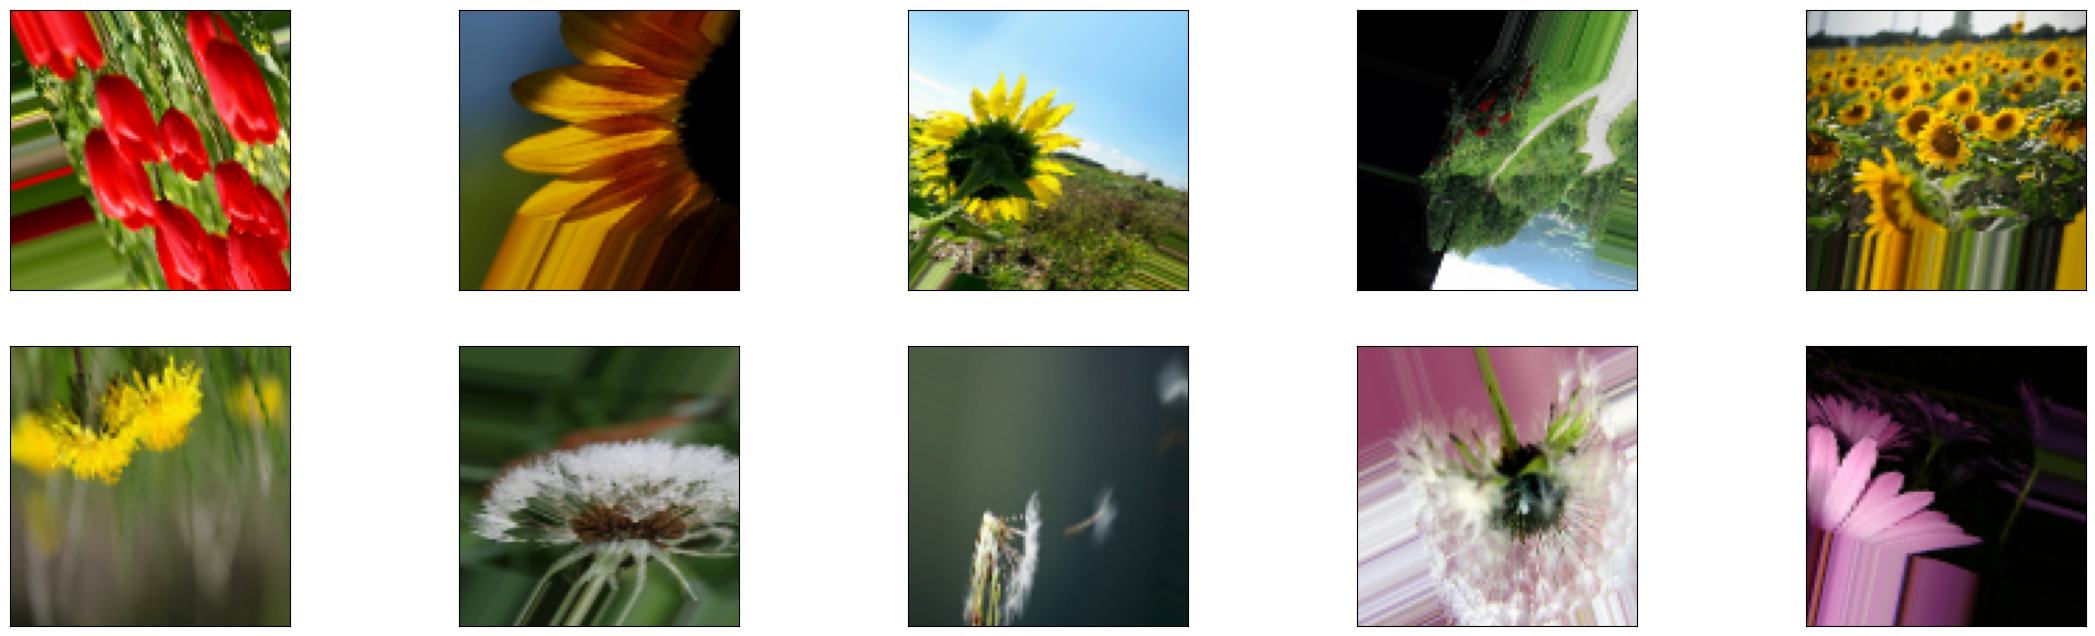

In [17]:
#Show some genetated images
plt.figure(figsize=(28,8))

for image, label in data_gen.flow(x, y, batch_size=10, shuffle=False):
    for i in range(10):
        plt.subplot(2,5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(image[i].reshape(100,100,3))
    break

In [18]:
#Split the dataset into train and validation
sample = int(len(x) * .85)

x_train = x[:sample]
x_validation = x[sample:]

y_train = y[:sample]
y_validation = y[sample:]

In [19]:
gen_data_train = data_gen.flow(x_train, y_train, batch_size=32)

Save the data

In [21]:
np.savez('../data/preprocessed/data_train', inputs=gen_data_train.x, targets=gen_data_train.y)
np.savez('../data/preprocessed/data_validation', inputs=x_validation, targets=y_validation)